## **<span style="color:gray; font-family:Garamond;"> Final Project - Group 45**
# <span style="color:black; font-family:Garamond;"> Journalists Killed Worldwide
### **<span style="color:black; font-family:Garamond;"> Name Of Students:**
**<span style="color:black; font-family:Garamond;">Lauren Mantzur<br>**
**<span style="color:black; font-family:Garamond;">Orin Karavani<br>**
**<span style="color:black; font-family:Garamond;">Omer Levi**

    

    
<div>
<img src="https://www.ifj.org/fileadmin/_processed_/e/5/csm_battleface-ifj-press-4_8a8191d543.jpg" width="800"/>
<figcaption align="center">
    <small> </small>
</figcaption>
</div>

<b id="Top"> </b>  

1. [Libraries ;](#1)
2. [Add Columns And Order ;](#2)

<a id='1'></a>

# <b id="section_1">  </b> <b style='color:brown; font-family:Garamond;'>1. Libraries ; </b> <b></b> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn as sk
from IPython.display import Image

<div dir="rtl">

#### מידע ומטרת הפרוייקט:
##### מציאת קשרים שונים למוות של עיתונאים, ולבדוק כיצד אפשר להפחית את האלימות כלפיהם.
<br>נלקח מ: [קאגל](https://www.kaggle.com/datasets/cpjournalists/journalists-killed-worldwide-since-1992?select=cpj.csv)

 </div>

In [2]:
url = 'https://raw.githubusercontent.com/lauMren/Journalists-Project/main/cpj.csv'
jour_df = pd.read_csv(url)
jour_df.head(4)

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n


# <b id="section_2">  </b> <b style='color:green; font-family:Garamond;'>2. Add Columns And Data Changes ; </b> <b></b> 

<div dir="rtl">

###### לא ניתן לראות את התוכן בעמודה "עינויים" - נסדר אותה:

In [3]:
jour_df['Tortured'] = jour_df['Tortured'].str.replace(r'\n', '').str.strip()
jour_df['Tortured'].replace('', np.nan, inplace=True)
unique_tor = jour_df['Tortured'].unique()
jour_df.head(4)

C:\Users\loren\AppData\Local\Temp\ipykernel_10500\3349174261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jour_df['Tortured'].replace('', np.nan, inplace=True)


,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No


In [4]:
rows_and_col = jour_df.shape
print(rows_and_col)
jour_df.columns

(1782, 18)


Index(['Type', 'Date', 'Name', 'Sex', 'Country_killed', 'Organization',
       'Nationality', 'Medium', 'Job', 'Coverage', 'Freelance',
       'Local_Foreign', 'Source_fire', 'Type_death', 'Impunity_for_murder',
       'Taken_captive', 'Threatened', 'Tortured'],
      dtype='object')

<div dir="rtl">

###### נבצע מספר שינויים בדאטה:
###### חלוקה לקטגוריות ושינויי type 

</div>

In [5]:
jour_df['Date'] = pd.to_datetime(jour_df['Date'], errors='coerce')
jour_df['Year'] = jour_df['Date'].dt.year
jour_df['Month'] = jour_df['Date'].dt.month

In [6]:
jour_df['Year'] = jour_df['Year'].astype('Int64')
jour_df['Month'] = jour_df['Month'].astype('Int64')

<div dir="rtl">

###### חילוץ תחומים למספר עמודות

In [7]:
jour_df['Coverage'] = jour_df['Coverage'].fillna('').astype(str)

In [8]:
jour_df['Classify cover'] = jour_df['Coverage'].apply(lambda x: x.split(', '))

In [9]:
unique_coverage = set([category for sublist in jour_df['Classify cover'] for category in sublist])

In [10]:
for category in unique_coverage:
    jour_df[category] = jour_df['Classify cover'].apply(lambda x: category in x)

In [11]:
## כאן, נהפוך את העמודות שיצרנו (שהיו בוליאנים) לטייפ אינט כדי לסכום בקלות בהמשך

jour_df[['War', 'Sports', 'Human Rights', 'Politics', 'Culture','Business', 'Corruption', 'Crime']] = jour_df[['War', 'Sports', 'Human Rights', 'Politics', 'Culture','Business', 'Corruption', 'Crime']].astype(int)

In [12]:
jour_df.info()
empty = jour_df.isnull().sum()

jour_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Type                 1782 non-null   object        
 1   Date                 1708 non-null   datetime64[ns]
 2   Name                 1782 non-null   object        
 3   Sex                  1216 non-null   object        
 4   Country_killed       1781 non-null   object        
 5   Organization         1779 non-null   object        
 6   Nationality          1499 non-null   object        
 7   Medium               1216 non-null   object        
 8   Job                  1210 non-null   object        
 9   Coverage             1782 non-null   object        
 10  Freelance            1217 non-null   object        
 11  Local_Foreign        1217 non-null   object        
 12  Source_fire          1215 non-null   object        
 13  Type_death           1217 non-nul

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,...,Classify cover,,Politics,Business,Sports,Crime,Corruption,Human Rights,War,Culture
0,Motive Confirmed,2016-10-22,Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,...,[War],False,0,0,0,0,0,0,1,0
1,Motive Confirmed,2016-10-21,Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",...,"[Politics, War]",False,1,0,0,0,0,0,1,0
2,Motive Confirmed,2016-10-02,Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",...,"[Politics, War]",False,1,0,0,0,0,0,1,0
3,Motive Confirmed,2016-08-14,Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,...,[War],False,0,0,0,0,0,0,1,0
4,Motive Confirmed,2016-08-08,Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",...,"[Business, Corruption, Crime, Culture, Human R...",False,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,Motive Unconfirmed,1992-08-03,Robinson Joseph,NaN,Haiti,Radio Lumière,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0
1778,Motive Unconfirmed,1992-07-03,Ladjid Jade Ladja,NaN,Philippines,Prensa Zamboanga,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0
1779,Motive Unconfirmed,1992-06-02,Mecit Akgun,NaN,Turkey,Yeni Ulke,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0
1780,Motive Unconfirmed,1992-02-27,Bakshi Tirath Singh,NaN,India,Hind Samachar,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0


<div dir="rtl">
    
__________________________________________
###### 1 - תיקון העמודה tortured שלא הוצגה כראוי
###### 2 - הוספת עמודות: חודש ושנה
###### 3 - תחום הסיקור של העיתונאי - הפיכה מטיפוס בוליאני לנומרי, כך שכל תחום יהווה עמודה חדשה שנוכל לסכום
__________________________________________
</div>

# <b id="section_3">  </b> <b style='color:purple; font-family:Garamond;'>3. Review & Distrubition ; </b> <b></b>

In [13]:
years_counts = jour_df['Year'].value_counts().sort_index()
month_counts = jour_df['Month'].value_counts().sort_index()

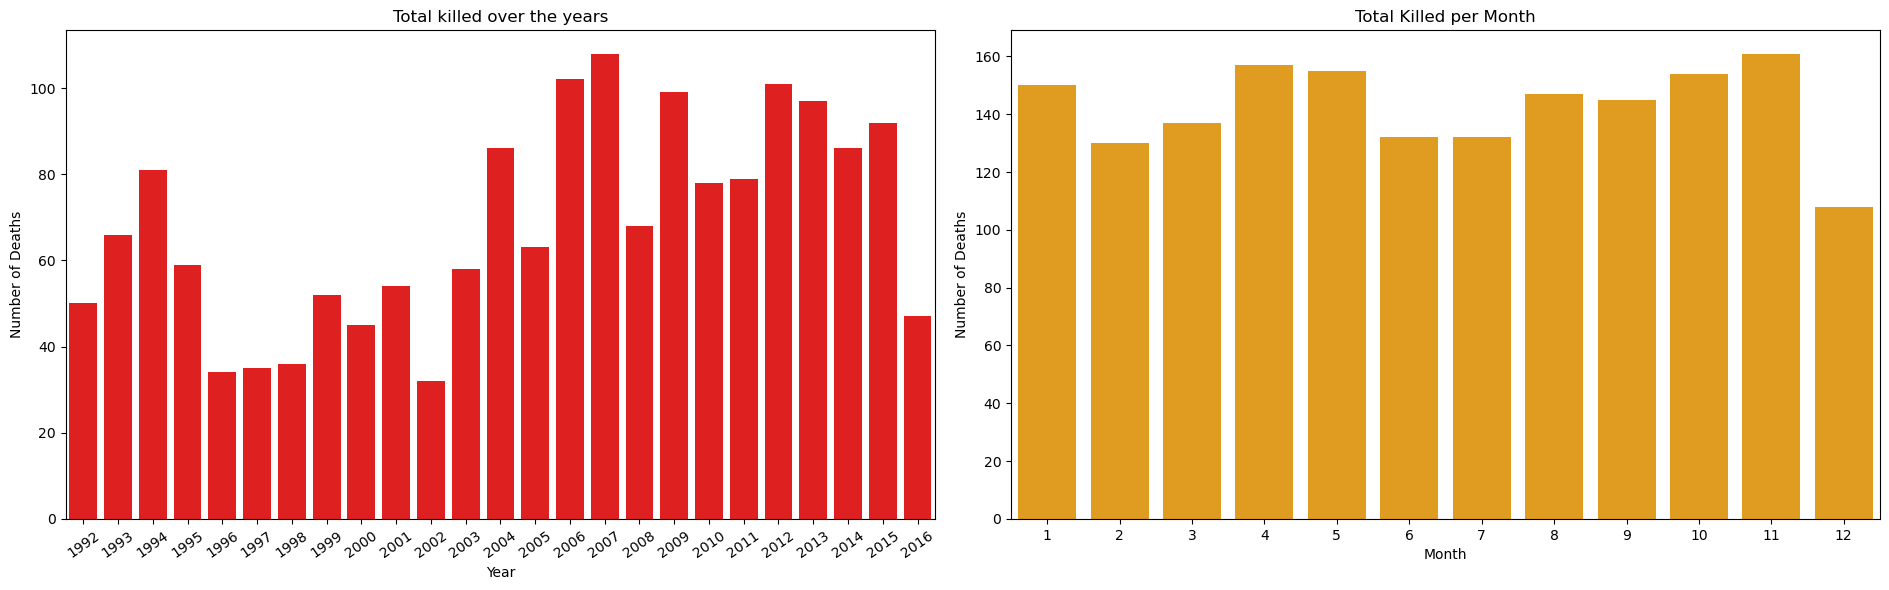

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(19, 6))

# death every year - RED
sns.barplot(ax=axes[0], x=years_counts.index, y=years_counts.values, color="red")
axes[0].set_title('Total killed over the years')
axes[0].set_ylabel('Number of Deaths')
axes[0].set_xlabel('Year')
axes[0].tick_params(axis='x', rotation=35)

# death every month - ORANGE
sns.barplot(ax=axes[1], x=month_counts.index, y=month_counts.values, color="orange")
axes[1].set_title('Total Killed per Month')
axes[1].set_ylabel('Number of Deaths')
axes[1].set_xlabel('Month')
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()

#### את זה להזיז למטה איפשהו קשור לתאריכים שאורין תעשה 

In [81]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\loren\AppData\Local\Temp\ipykernel_10500\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [82]:
country_counts = jour_df['Country_killed'].value_counts().reset_index().copy()
country_counts.columns = ['name', 'count']

In [83]:
world = world.merge(country_counts, how='left', left_on='name', right_on='name')

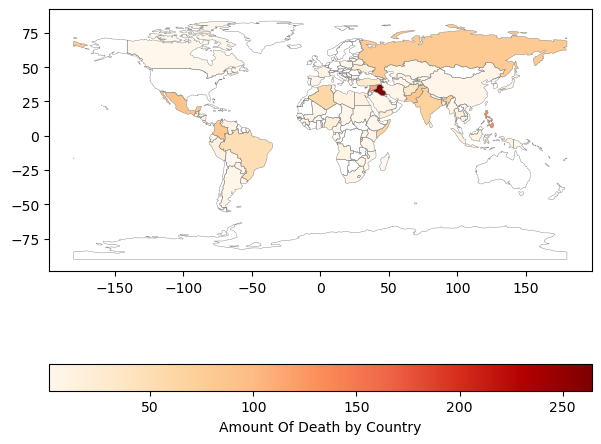

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
world.boundary.plot(ax=ax, linewidth=0.31, color='grey')
world.plot(column='count', ax=ax, legend=True, legend_kwds={'label': "Amount Of Death by Country",'orientation': "horizontal"}, cmap='OrRd')
plt.show()

<div dir="rtl"> 

#####   הפריסת בעולם רחבה מאוד, לכן נתמקד בעשר המדינות בהן כמות ההרוגים היא הגבוהה ביותר
##### ונבדוק בהן את מקרי המוות השונים

</div>

In [85]:
topTen = jour_df['Country_killed'].value_counts().nlargest(10).index

In [86]:
filtered_jour = jour_df[jour_df['Country_killed'].isin(topTen)]

<function matplotlib.pyplot.show(close=None, block=None)>

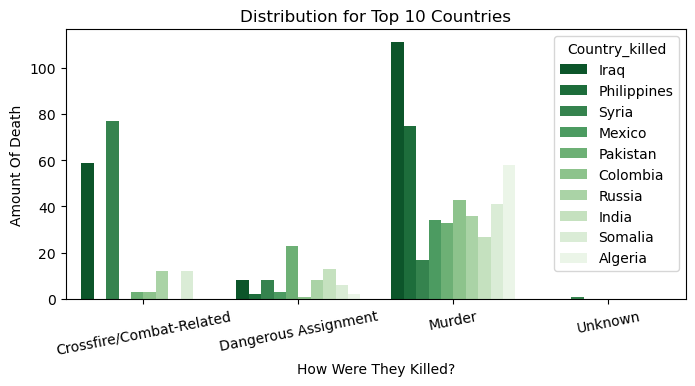

In [87]:
plt.figure(figsize=(8,3.5))
sns.countplot(data=filtered_jour, x='Type_death', hue='Country_killed', palette="Greens_r",  hue_order=topTen)

plt.title('Distribution for Top 10 Countries')
plt.xlabel('How Were They Killed?')
plt.ylabel('Amount Of Death')
plt.xticks(rotation=11)
plt.show

<div dir="rtl">

____________  
### 1. הסיבות בגללן מתו העיתונאים:
##### במבט על, ניתן להסיק כי רוב מקרי המוות בקרב עיתונאים הם מקרי רצח.
__________
#####  1. במדינות עולם שלישי, הרוויות בפשיעה, יש רוב של נרצחים - מה שמתכתב עם ההיגיון.


##### 2. בין המדינות הערביות לעומת זאת יש הבדלים:

#####  * בסוריה - הרוב המוחלט נהרגו בחילופי אש ולא במכוון. 
##### * בעיראק - לעומת זאת, הרוב נרצחו - מה שגורם לתהייה.
###### עיראק בדומה לסוריה, חווה מלחמות רבות, ועדיין,
###### פי 2 מהעיתונאים נרצחו בכוונת מכוון. ניתן להבין כי עיראק מסוכנת לעיתונאים הרבה יותר מכל מדינה אחרת.
_____________
#### תופעת הרצח גורמת למחאות נרחבות בעולם, ומעוררת שאלות רבות לגבי בטחון העיתונאים
#### והסיכונים הכרוכים בהעברת המידע לציבור.
#### על מנת להבין טוב יותר את התפלגות ההרוגים, נציג גרפי פיזור ומדינות חריגות.
##### נבדוק האם באמת בכל המדינות יש רוב של נרצחים, או שיש מדינות שמטות את הכף (influence an outcome)
</div>

In [88]:
murder_counts = jour_df[jour_df["Type_death"] == "Murder"].groupby("Country_killed").size()
crossfire_counts = jour_df[jour_df["Type_death"] == "Crossfire/Combat-Related"].groupby("Country_killed").size()
assignment_counts = jour_df[jour_df["Type_death"] == "Dangerous Assignment"].groupby("Country_killed").size()

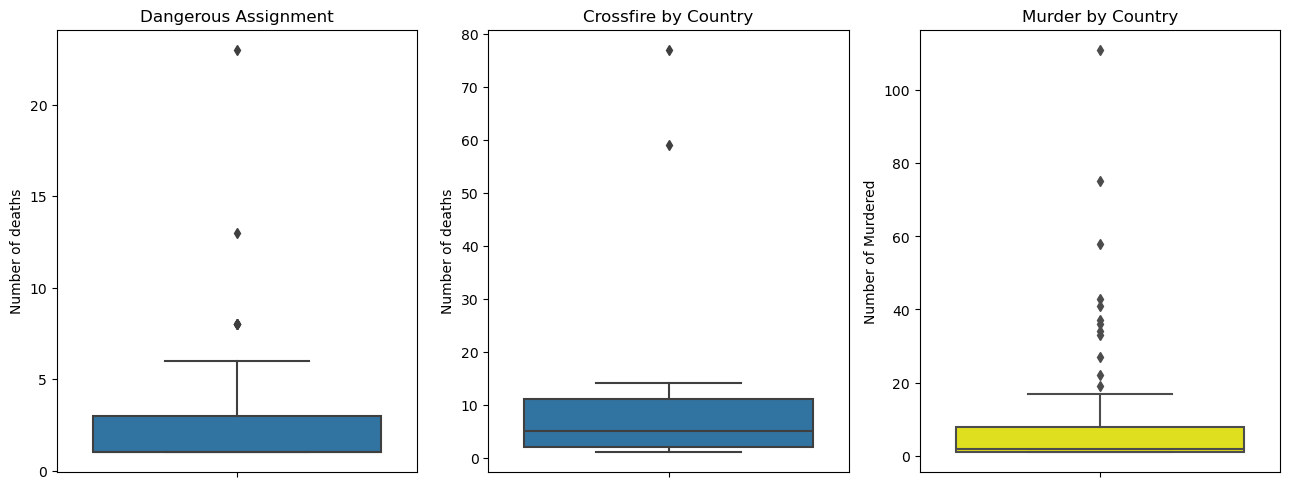

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

sns.boxplot(y=murder_counts, ax=axes[2], color='yellow')
axes[2].set_title('Murder by Country')
axes[2].set_ylabel('Number of Murdered')

sns.boxplot(y=crossfire_counts, ax=axes[1])
axes[1].set_title('Crossfire by Country')
axes[1].set_ylabel('Number of deaths')

sns.boxplot(y=assignment_counts, ax=axes[0])
axes[0].set_title('Dangerous Assignment')
axes[0].set_ylabel('Number of deaths')

plt.tight_layout()
plt.show()

<div dir="rtl">

##### מדדי הפיזור של כלל המקרים די זהים, בין 0 ל10 הרוגים בכל קטגוריה.
___________
#####  דבר זה מוכיח כי הסתכלות חלקית על הנתונים אינה משקפת תמיד את המציאות,
##### רצח הוא לא הסיבה העיקרית למוות של עיתונאים כמו שחשבנו,
##### אלא כי ישנן מדינות עם מספר נרצחים חריג, שמשפיעות על האיזון באופן מובהק.
___________
##### למרות זאת , נמשיך לחקור את מקרי הרצח על מנת להבין מה יכול לגרום לכך. נשאל את עצמנו:

<div dir="rtl">

__________
### האם יש נושאים שמסוכן יותר לסקר?
###### - מקרי הרצח בלבד

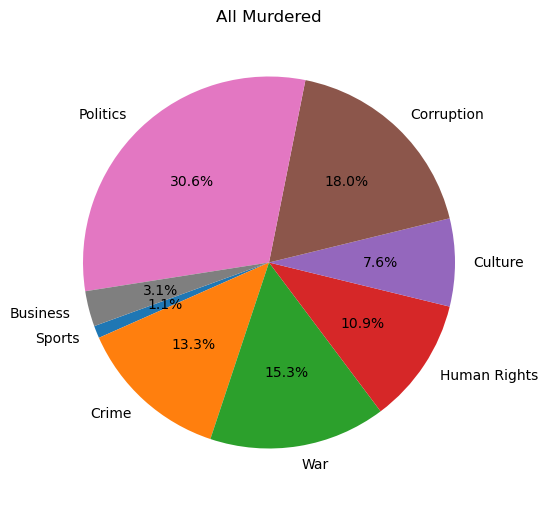

In [91]:
murdered = jour_df[jour_df['Type_death'] == 'Murder']

sports = murdered['Sports'].sum()
crime = murdered['Crime'].sum()
war = murdered['War'].sum()
human_rights = murdered['Human Rights'].sum()
culture = murdered['Culture'].sum()
corruption = murdered['Corruption'].sum()
politics = murdered['Politics'].sum()
busines = murdered['Business'].sum()


counts = [sports, crime, war, human_rights, culture, corruption, politics, busines]
fields = ['Sports', 'Crime', 'War', 'Human Rights', 'Culture', 'Corruption', 'Politics', 'Business']

plt.figure(figsize=(6, 10))
plt.pie(counts, labels=fields, autopct='%1.1f%%', startangle=200)
plt.title('All Murdered')
plt.show()

<div dir="rtl">
    
_________
### מסקנה על פי הגרפים:
_________
#### התשובה היא - כן. יש תחומים שמסוכן יותר לסקר.
##### לא מפתיע שהחלוקה אינה שווה.
##### מה שכן מנוגד להיגיון -  כתבים לענייני שחיתות ופוליטיקה נרצחים יותר מכתבים לעינייני פשיעה ומלחמה.
__________________________
#### סיקור פוליטי וחשיפת שחיתות גורמת לעיתונאים להיות פגיעים יותר  (אפילו יותר מאזורי לחימה). 
__________________________
##### 1. ייתכן ובעלי כוח מנצלים את מעמדם - בכירים משפיעים על הסביבה, ויש להם סיי, בישירין או בעקיפין,
##### מה שגורם לתומכיהם לנהוג באלימות כלפי העיתונאים שחשפו את האמת, במקרה הזה לרעתם.
##### רוב מקרי הרצח הם פעולות נקם, אך מפתיע שנציגי ציבור נותנים לזה יד.

##### 2. הבעת דעה פוליטית עלולה לסכן את חיי העיתונאים. רצוי להימנע מלהביע עמדה פוליטית, ולסקר את האירוע בצורה
##### אובייקטיבית ומקצועית. 
##### אפשר לראות כי במדינות דיקטטוריות וערביות יש רוב של נרצחים, מלבד סוריה כמובן.

In [ ]:
#################### להזיז למטה

<div dir="rtl">
    
#### ראינו קודם כי הפיליפינים, סוריה ועיראק מובילות במקרי הרצח.
#### האם יש קשר בין ריכוז ההרוגים לבין תאריכים ספציפיים?
##### נחפש אירועים מרכזיים:

**טבח מינדאנו - פיליפינים 23 בנובמבר 2009:** 
באותו יום התרחש טבח במינדנאו שבפיליפינים. הטבח הזה נחשב לאחת התקריות האלימות הקשות ביותר נגד אנשי תקשורת. במהלך התקרית, חמושים רצחו לפחות 57 בני אדם, בינהם לפחות 32 עיתונאים, עורכי דין ותומכים של פוליטיקאי מקומי שהיה אמור להגיש את מועמדותו לבחירות המקומיות. 

**אירוע מרכזי בעיראק - 12 באוקטובר 2006** 
באותו יום היו מספר פיגועים ותקיפות אלימות ברחבי עיראק שגרמו למותם של עשרות, וביניהם עיתונאים עיראקים. הפיגועים התרחשו על רקע הסכסוך בין פלגים שונים במדינה.
    
ובאופן כללי, מאז הפלישה האמריקאית ב-2003, המדינה הייתה שקועה במערבולת של אלימות עדתית, טרור ופעילות מיליציות חמושות, שהפכו את עבודתם של העיתונאים למסוכנת במיוחד.      על פי נתוני ארגונים בינלאומיים לזכויות עיתונאים, עשרות עיתונאים נהרגו בעיראק מאז תחילת הסכסוך, רבים מהם כתוצאה מהתקפות מכוונות.

**מתקפת טרור בפריז - 7 בינואר 2015:**
באותו יום מחבלים נכנסו למשרדי העיתון הסאטירי "שארלי הבדו" בפריז ופתחו באש. בין ההרוגים היו עורכים, קריקטוריסטים, עיתונאים ושני שוטרים. המתקפה בוצעה על ידי פעילי ג'יהאד האיסלאמי והייתה תגובה לתוכן שפרסם העיתון, שנחשב פוגעני כלפי האסלאם

</div>

<div dir="rtl"> 
    
* מסקנה 
אמנם יש ריכוז הרוגים באירועים מרכזיים, אך לא בכל מדינה בה היה אירוע מסוקר היה גם רוב של הרוגים. כפי שניתן לראות בצרפת למשל, שאינה נכללת בעשירייה הראשונה. כלומר כמות הרוגים לא תלויה באירוע אלא נטו בסיכון במדינה או היחס של המדינה כלפי עיתונאים. 

In [ ]:
################################### להזיז את כל מה שמעל, למטה

In [96]:
total_females = jour_df[jour_df['Sex'] == 'Female'].shape[0]
total_males = jour_df[jour_df['Sex'] == 'Male'].shape[0]
print('There is', total_females, 'Woman and', total_males, 'Man that killed. the rest are unknown')

There is 80 Woman and 1136 Man that killed. the rest are unknown


<div dir="rtl">

##### הרוב המוחלט של העיתונאים שנהרגו הם גברים !
#####  נרצה לשמור על היחס בין הנרצחים לנרצחות.  מי מבין המינים נתון לסכנה גדולה יותר?

In [29]:
female_murdered = murdered[murdered['Sex'] == 'Female'].shape[0]
male_murdered = murdered[murdered['Sex'] == 'Male'].shape[0]

female_murdered_percentage = (female_murdered / total_females) * 100
male_murdered_percentage = (male_murdered / total_males) * 100

In [98]:
ratio = male_murdered_percentage / female_murdered_percentage
print('Man : Woman =',ratio)

Man : Woman = 0.9117865085248332


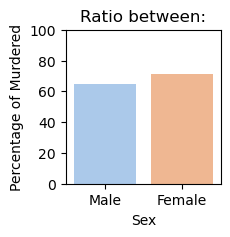

In [102]:
murdered_percentages = pd.DataFrame({
    'Sex': ['Male', 'Female'],
    'Percentage': [male_murdered_percentage, female_murdered_percentage]})

plt.figure(figsize=(2, 2))
sns.barplot(x='Sex', y='Percentage', data=murdered_percentages, palette='pastel')
plt.title('Ratio between:')
plt.xlabel('Sex')
plt.ylabel('Percentage of Murdered')
plt.ylim(0, 100)
plt.show()

<div dir="rtl"> 
 אמנם מספר הגברים שנרצחו הוא פי 12 ממספר הנשים, אך באופן יחסי - נשים נרצחו יותר מגברים!  
    עובדה זו צריכה לגרום לאי נוחות בקרב הציבור וגם בקרב מעסיקי העיתונאיות. לא ייתכן שנשים יסקרו אירועים, יציגו בפני העולם את האמת ויהיו נתונות לסכנה כל כך גדולה, רק בשל היותן נשים. כדי לצמצם פגיעות בנשים, ראוי שחברת חדשות תיתן הגנה לנשים שעובדות בחברה, כדי שיוכלו לעשות את עבודתן נאמנה מבלי לחשוש באופן תמידי לחייהן. חשש שכזה עלול להוביל לחוסר בעיתונאיות ולהציג אך ורק תחומים בהם גברים מסקרים יותר, ולהזניח תחומים אחרים.

<div dir="rtl"> 

## הרוגים לפי קטגוריות שונות

In [32]:
jour_df.loc[jour_df['Organization'].isin(['Freelance', 'freelance', 'Freelancer']), 'Organization'] = 'Freelancer'

In [33]:
Ten_Organizations = jour_df['Organization'].value_counts().head(10)

In [34]:
Ten_Medium = jour_df['Medium'].value_counts().head(10)

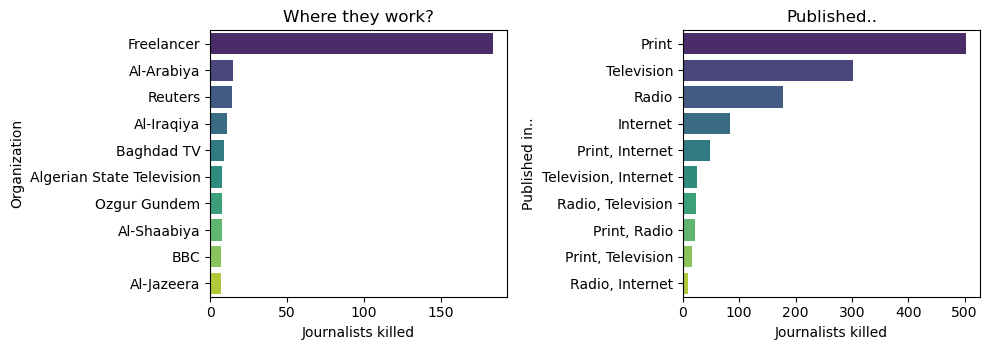

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.6))

# גרף שמאלי - ארגונים
sns.barplot(x=Ten_Organizations.values, y=Ten_Organizations.index, palette='viridis', ax=axes[0])
axes[0].set_title('Where they work?')
axes[0].set_xlabel('Journalists killed')
axes[0].set_ylabel('Organization')

# גרף ימני - איפה פורסם
sns.barplot(x=Ten_Medium.values, y=Ten_Medium.index, palette='viridis', ax=axes[1])
axes[1].set_title('Published..')
axes[1].set_xlabel('Journalists killed')
axes[1].set_ylabel('Published in..')

plt.tight_layout()
plt.show()

<div dir="rtl">


# לחזור לזה
#####  גרף 1 - פרילנסרים נהרגים משמעותית יותר מכאלה שעובדים בערוץ מוסדר.  האם כדאי לקחת סיכון בסיקור כל עוד אינך עובד בחברה מסויימת?
##### הולכים בצורה פחות אחראית לסקר אירועים
#####  גרף 4 - כתבים שהציגו את הכתבות בעיתון או בטלוויזיה נהרגו יותר מכאלה ששידרו ברדיו , האם יש קשר לחשיפה שלהם? האם ברגע שיודעים מי הם הם פגיעים יותר?
##### או שמא חוששים יותר לפגוע בעיתונאים מוכרים יותר?

###### יש לציין כי ב2007 היו הכי הרבה הרוגים מכל המדינות, תקופה שבה אנשים לא השתמשו באינטרנט אלא צרכו את התכנים שלהם מעיתונים או מטלוויזיה, לכן הגיוני שבשנים האלה הכתבים ברובם היו גם כתבי טלוויזיה.

<div dir="rtl">
 
 ### האם יש קשר בין מוצא העיתונאי לבין קבלת פטור מעונש ?

<div>
<img src="https://github.com/lauMren/Journalists-Project/blob/main/%D7%94%D7%95%D7%A8%D7%93%D7%94.jpg?raw=true" width="500"/>
<figcaption align="center">
    <small> </small>
</figcaption>
</div>
 

In [36]:
#Impunity = jour_df['Impunity_for_murder'].value_counts()

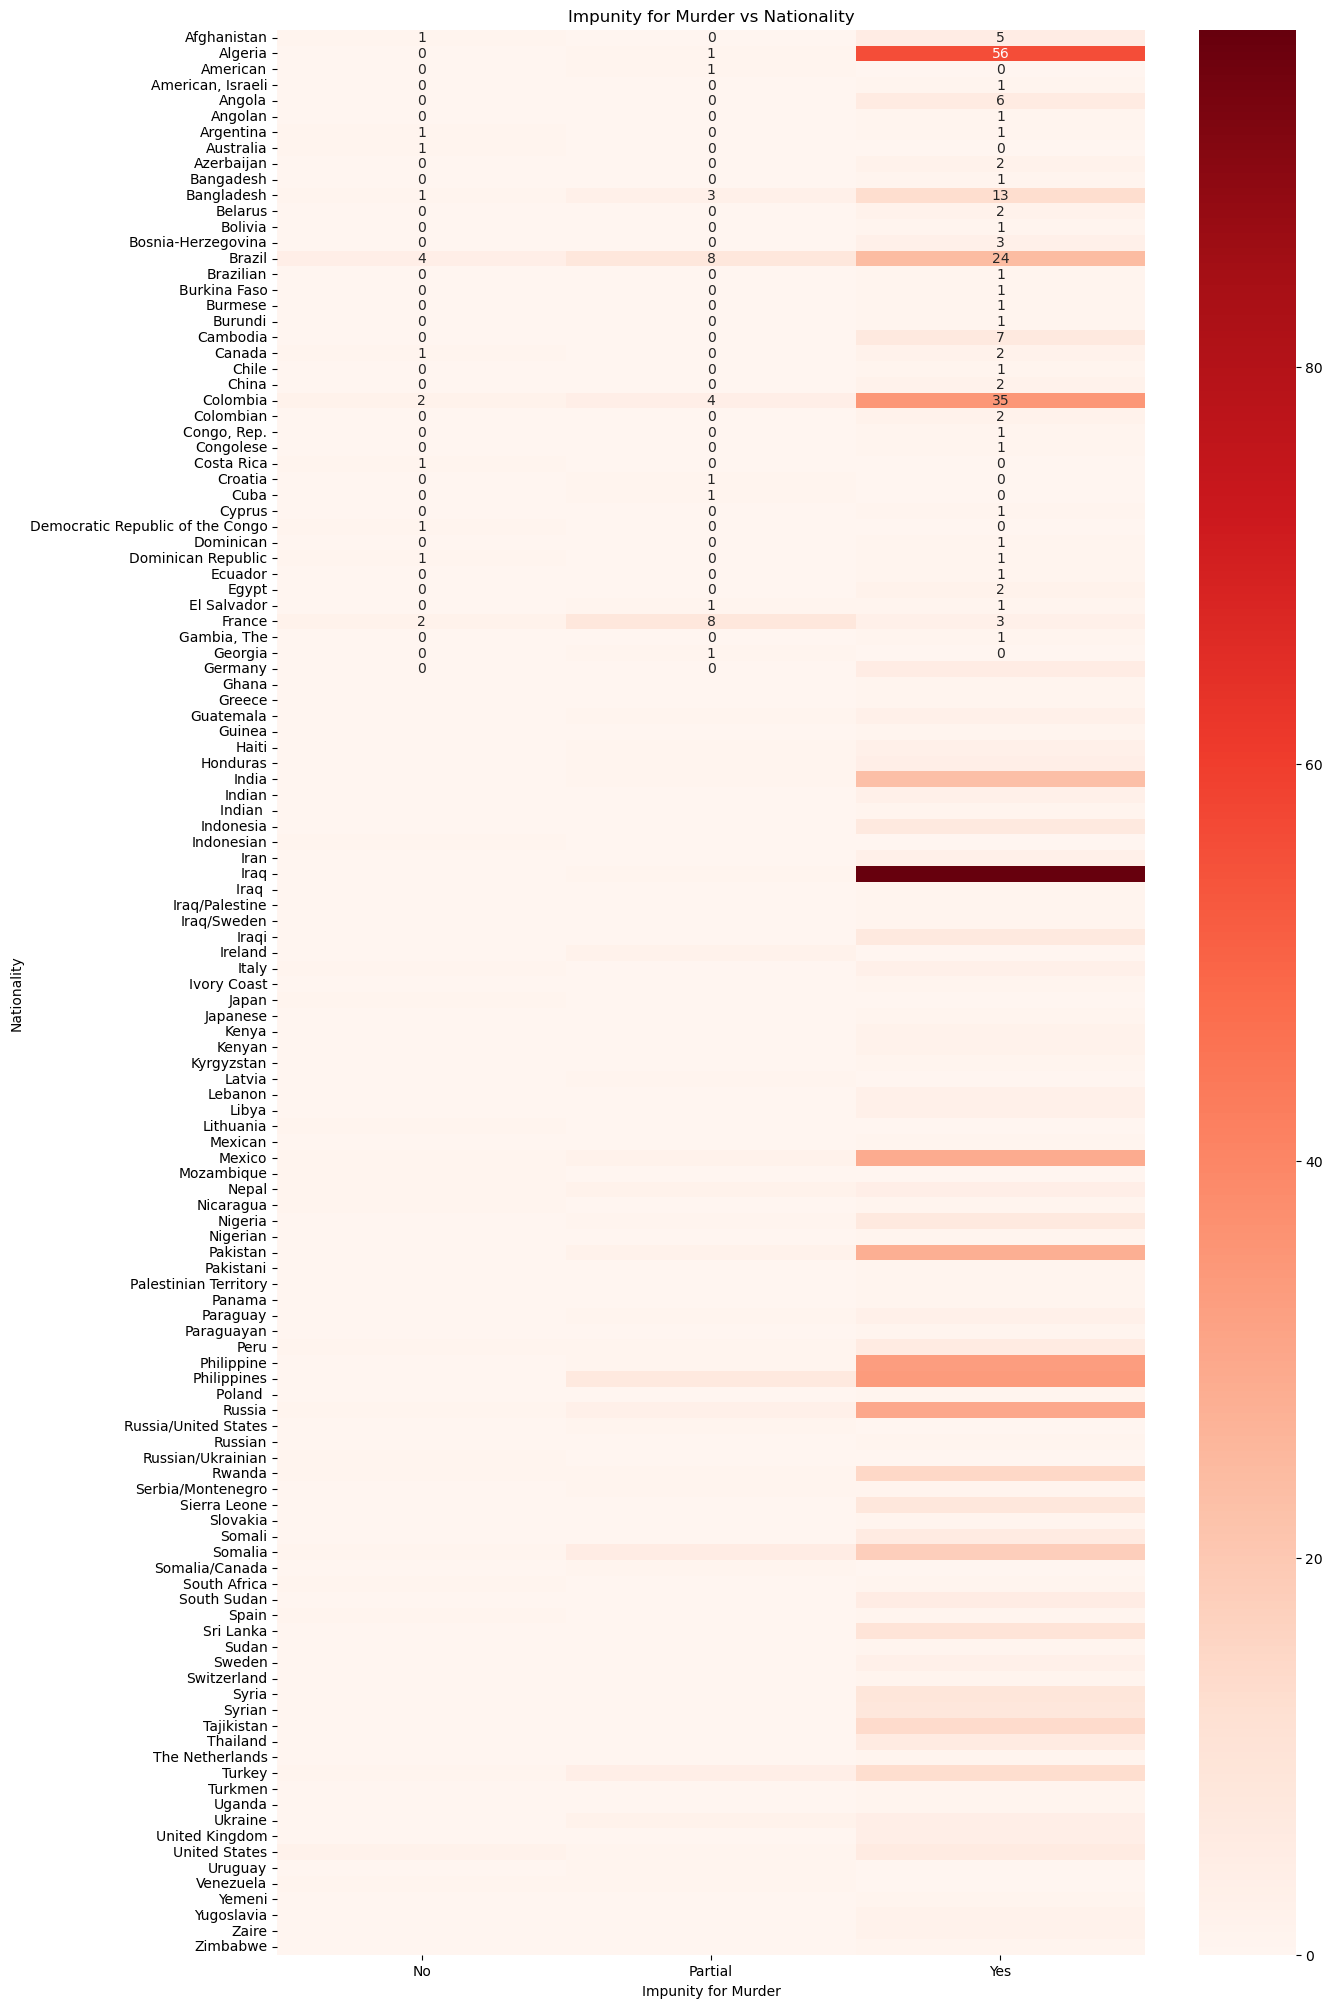

In [37]:
impunity_job_cross = pd.crosstab(jour_df['Nationality'], jour_df['Impunity_for_murder'])

plt.figure(figsize=(14, 25))
sns.heatmap(impunity_job_cross, annot=True, cmap='Reds', fmt='d')
plt.title('Impunity for Murder vs Nationality')
plt.xlabel('Impunity for Murder')
plt.ylabel('Nationality')
plt.show()

<div dir="rtl">

#### התשובה היא כן, יש קשר בין הלאום לבין קבלת חסינות
##### ישנם הרבה עיתונאים שנרצחו כנקמה על עבודתם. 
##### חמשת המדינות המובילות בנתינת חסינות הן עיראק, אלג'יריה, בנגלדש, ברזיל וקולומביה.
##### מה שמשותף למדינות אלה הוא סכסוך, פשיעה, חוסר יציבות פוליטית ושלטון חוק חלש. ייתכן וכי מדינות אלה אינן משקיעות במשאבים ובחיפוש צדק למען העיתונאים שנרצחו, ומעדיפים לטייח את הנושא.

נחזור להתפלגות בגרף הפאי בה ראינו שפוליטיקה ושחיתות הן הסיבות המובילות לרצח - **הסקנו כי בעלי מעמד מנצלים את כוחם**. כעת ניתן לראות כי **קטע זה מאשש את מסקנתנו.**

<br>להלן קטע הלקוח מתוך [הכתבה](https://cpj.org/reports/2022/11/killing-with-impunity-vast-majority-of-journalists-murderers-go-free/) 
__________________________________
"even in less volatile countries with democratically elected governments, authorities show little political will for prosecuting journalists killers or curbing violence against the press. **Rather, leaders, such as Mexican President** Andrés Manuel López Obrador **and Brazilian President** Jair Bolsonaro, **regularly launch verbal attacks on the media even as reporters face constant threats for their vital reporting on crime, corruption, and environmental issues** 
___________________________________

<div dir="rtl">

#### האם כאלה שעברו עינויים גם קיבלו איומים? או שמא לא ניתן לדעת למה יקרה לעיתונאי בעת סיקור?

נלקחו בשבי : 190

קיבלו איומים: 322  

עברו עינויים : 99 

In [38]:
connection = jour_df.copy()

connection['Taken_captive'] = connection['Taken_captive'].map({'Yes': 1, 'No': 0})
connection['Threatened'] = connection['Threatened'].map({'Yes': 1, 'No': 0})
connection['Tortured'] = connection['Tortured'].map({'Yes': 1, 'No': 0})
connection['Freelance'] = connection['Freelance'].map({'Yes': 1, 'No': 0})

In [39]:
relevant_connection = connection[['Taken_captive', 'Threatened', 'Tortured', 'Freelance']]

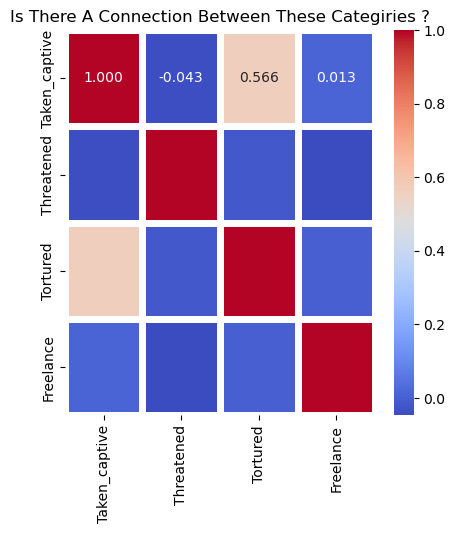

In [40]:
correlation_matrix = relevant_connection.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=5)
plt.title('Is There A Connection Between These Categiries ?')
plt.show()

<div dir="rtl">

להמשיך
##### בין אלו שנלקחו בשבי לבין אלו שאוימו בצורה כלשהי, אין קשר כלל. 
##### יש קשר, די בינוני בין כאלו שנחטפו לבין כאלה שהתעללו בהם. הגיוני למדי שעיתונאי שנחטף עבר התעללות כזו או אחר, אך משום שמקדם הקורלציה הוא 0.56 

<div dir="rtl">

# מוות של עיתונאים בישראל  
##### כישראלים, נרצה לבדוק את ההתנהלות כלפי עיתונאים המסקרים בארץ
#### האם כמו במדינות אחרות ישראל מטייחת מקרי מוות, או שמא יש יחס שונה?
##### ישראל היא מוקד משמעותי לסיקור, בעיקר בתחומי צבא ומלחמות מול המדינות הסובבות אותנו. לכן, עיתונאים נמצאים באזורי קרב חשופים למקורות ירי שונים, צבא, ירי מחבלים וכדומה.

In [41]:
all_Israel = jour_df[jour_df['Country_killed'] == 'Israel and the Occupied Palestinian Territory']

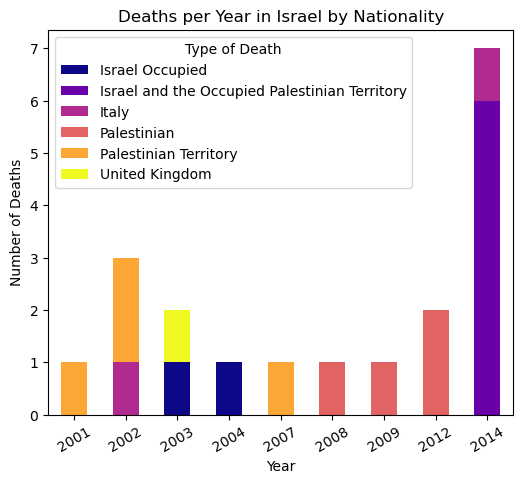

In [42]:
per_year = all_Israel.groupby(['Year', 'Nationality']).size().reset_index(name='Count')
pivot_df = per_year.pivot(index='Year', columns='Nationality', values='Count').fillna(0)
pivot_df.plot(kind='bar', stacked=True, figsize=(6, 5), colormap='plasma')

plt.title('Deaths per Year in Israel by Nationality')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')


plt.xticks(rotation=30)
plt.legend(title='Type of Death')
plt.show()

In [43]:
murdered_IL = all_Israel[all_Israel['Type_death'] == 'Murder'].shape[0]
killed_War_IL = all_Israel[all_Israel['Type_death'] == ('Crossfire/Combat-Related')].shape[0]

print('The number of murdered in our country:', murdered_IL)
print('Total death in wars:', killed_War_IL)

The number of murdered in our country: 1
Total death in wars: 14


In [44]:
sports = all_Israel['Sports'].sum()
crime = all_Israel['Crime'].sum()
war = all_Israel['War'].sum()
human_rights = all_Israel['Human Rights'].sum()
culture = all_Israel['Culture'].sum()
corruption = all_Israel['Corruption'].sum()
politics = all_Israel['Politics'].sum()
business = all_Israel['Business'].sum()

In [45]:
will_count = [sports, crime, war, human_rights, culture, corruption, politics, business]
covers = ['Sports', 'Crime', 'War', 'Human Rights', 'Culture', 'Corruption','politics', 'Business']

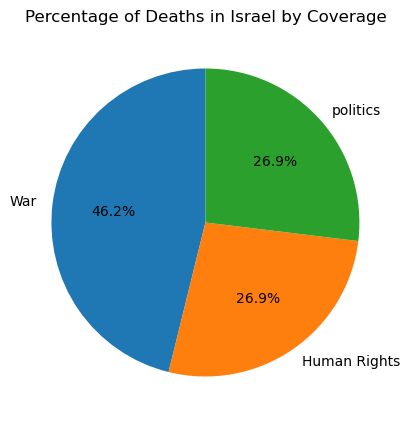

In [46]:
filt_counts = [count for count in will_count if count > 0]
filt_fields = [field for field, count in zip(covers, will_count) if count > 0]

plt.figure(figsize=(5, 5))
plt.pie(filt_counts, labels=filt_fields, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Deaths in Israel by Coverage')
plt.show()

בישראל יש מקרה של רצח אחד בלבד! אמנם ישראל מדינה קטנה אך לדעתנו, כמות הסיקורים החיצוניים היא גדולה מאוד. עצם העובדה שיש פחות הרוגים בישראל ובאזור רצועת עזה, מעיד על כך שהמשטרה והמדינה עושה את מירב המאמצים לשמור על חיי העיתונאים. אפשר להגיד שישראל היא מהמדינות היותר בטוחות כלפי עיתונאים. רק 3 מבין כלל ההרוגים הם עיתונאים זרים, כאשר השאר הם ערבים ישראלים או כאלו שמגדירים את עצמם פלסטינים. 

<div dir="rtl">

##### עיתונאים זרים מסקרים גם בשטח ישראל, גם מעבר לקו הירוק וגם ברצועת עזה.
##### האינתיפאדה השנייה (2000 - 2005) מוטטה כמעט לחלוטין את הסכם אוסלו, והסלימה את הסכסוך בצורה קיצונית. במהלכה נמנו אלפי קורבנות, הן בקרב הלוחמים והן בקרב האזרחים. כמות העיתונאים שנהרגו בתקופה זו הוא 7 סך הכל.
##### למרות שהרבה עיתונאים היו נוכחים בישראל בשנים אלה, השנה בה נהרגו הכי הרבה עיתונאים הייתה 2014 - מלחמת צוק איתן. 
##### עובדה זאת מביאה אותנו למסקנה שישראל היא אחת המדינות הבטוחות ביותר לסקר בהן. עצם העובדה שבין 1992 לבין 2016 נרצח רק עיתונאי אחד, מעיד על כך שהיחס כלפי עיתונאים הוא יחס מקצועי ומאפשרים להם לעשות את עבודתם, יש חשיבות לשמירה על חייהם, ויש אכיפה במקרי אלימות או חלילה רצח. 
##### ייתכן ויש רצון אמיתי לשמור על חייהם, אך גם ישנה אפשרות שישראל חוששת ממעמדה בעולם- גם בפן התקשורתי. מדינת ישראל חווה ביקורות עולמיות כמעט בכל תחום, ואף אנטישמיות. טיוח של מקרי מוות לא יסייע למעמדה בעולם, אלא יזיק אף יותר.

In [103]:
###### יום שני לסדר

# ?האם יש קשר בין התאריכים/שנים למקרי המוות של העיתונאים

In [39]:
years_counts = jour_df['Year'].value_counts().sort_index()
month_counts = jour_df['Month'].value_counts().sort_index()

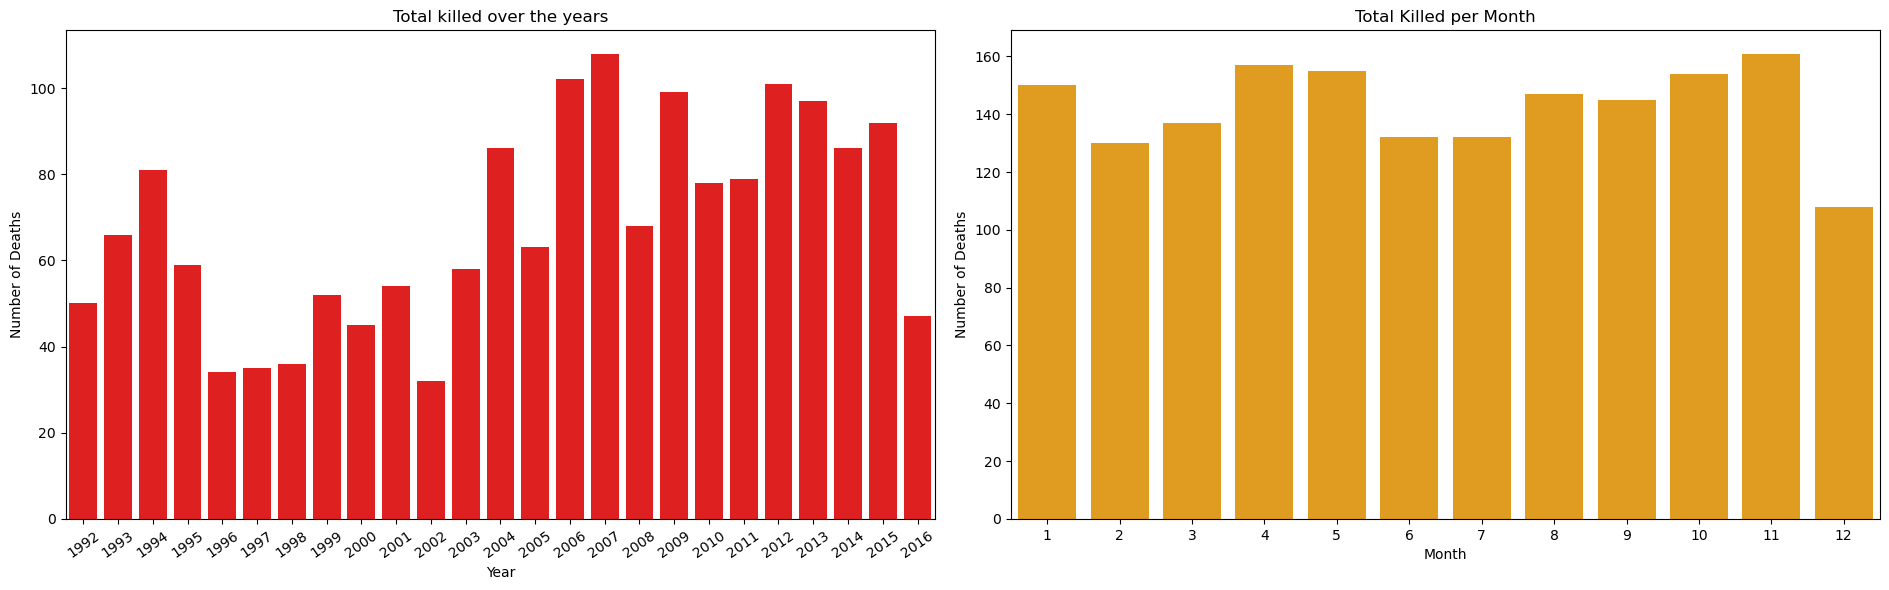

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(19, 6))

# death every year - RED
sns.barplot(ax=axes[0], x=years_counts.index, y=years_counts.values, color="red")
axes[0].set_title('Total killed over the years')
axes[0].set_ylabel('Number of Deaths')
axes[0].set_xlabel('Year')
axes[0].tick_params(axis='x', rotation=35)

# death every month - ORANGE
sns.barplot(ax=axes[1], x=month_counts.index, y=month_counts.values, color="orange")
axes[1].set_title('Total Killed per Month')
axes[1].set_ylabel('Number of Deaths')
axes[1].set_xlabel('Month')
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()

#### את זה להזיז למטה איפשהו קשור לתאריכים שאורין תעשה 

**לא מצאנו כי קיים קשר ישיר בין שנה מסויימת או חודש ספציפי לבין מקרי מוות של עיתונאים, נמשיך להעמיק ולבחון קשרים בין תאריכים שאולי יובילו אותנו לאירועים משמעותיים

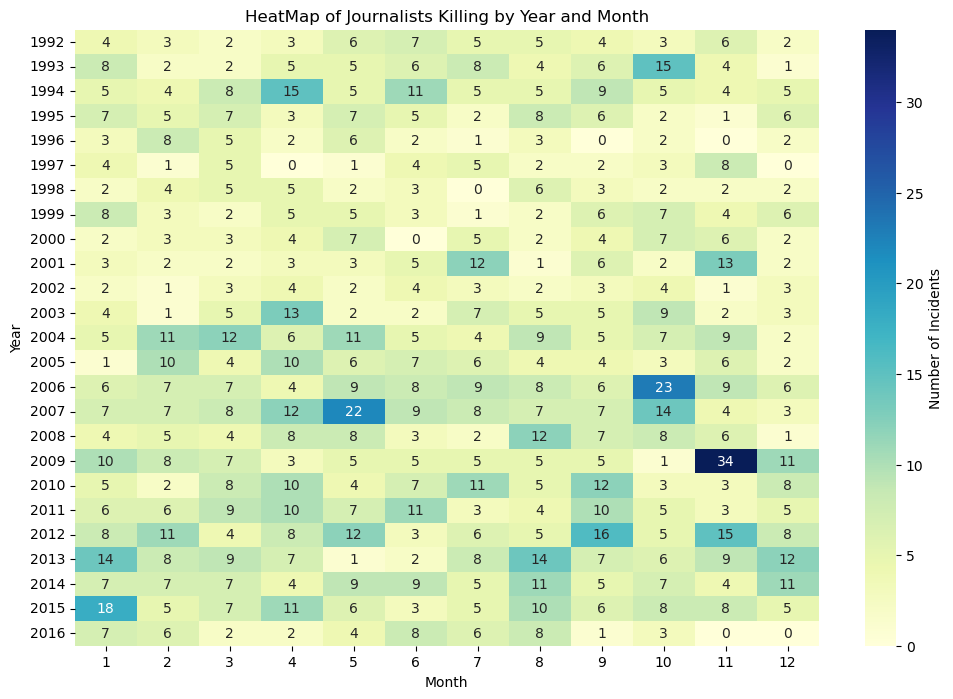

In [49]:
pivot_table = jour_df.pivot_table(index='Year', columns='Month', aggfunc='size', fill_value=0)

# ציור מפת החום באמצעות seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Incidents'})
plt.title('HeatMap of Journalists Killing by Year and Month')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

במאי 2007, התרחשו מספר אירועים שהובילו למקרי מוות רבים של עיתונאים. אחד האירועים הבולטים היה המתקפה בבגדאד, עיראק. במהלך תקופה זו, עיראק הייתה בשיאו של הסכסוך האלים לאחר הפלישה האמריקנית ב-2003. מלחמת האזרחים הלא-רשמית שהתרחשה בעיראק כללה לחימה אינטנסיבית בין כוחות אמריקאים לכוחות מורדים, וכן בין קבוצות אתניות ודתיות בתוך המדינה.

ב-27 במאי 2007, התרחש פיגוע כפול באזור אל-אמין שבמזרח בגדאד, בו נהרגו חמישה עיתונאים עיראקים שעבדו עבור תחנת הטלוויזיה סאהבה ("Baghdad TV"). זהו אחד האירועים המרכזיים שבו נהרגו עיתונאים רבים בבת אחת.

בנוסף, הסיכון של עיתונאים בעיראק היה גבוה מאוד במהלך התקופה הזו בשל האיומים המתמשכים מצד קבוצות מורדים ומיליציות, איומים מצד כוחות הממשלה, וכן חטיפות והוצאות להורג שמכוונות נגד עיתונאים שסיקרו את האירועים במדינה.

הסכסוך בעיראק, כמו גם הסיכונים שקשורים בעבודת עיתונאות במקומות עם חוסר יציבות פוליטית וביטחונית, תרמו לכך שמאי 2007 היה חודש קטלני במיוחד עבור עיתונאים.


#### ראינו קודם כי הפיליפינים, סוריה ועיראק מובילות במקרי הרצח.
#### האם יש קשר בין ריכוז ההרוגים לבין תאריכים ספציפיים?
##### נחפש אירועים מרכזיים:

**טבח מינדאנו - פיליפינים 23 בנובמבר 2009:** 
באותו יום התרחש טבח במינדנאו שבפיליפינים. הטבח הזה נחשב לאחת התקריות האלימות הקשות ביותר נגד אנשי תקשורת. במהלך התקרית, חמושים רצחו לפחות 57 בני אדם, בינהם לפחות 32 עיתונאים, עורכי דין ותומכים של פוליטיקאי מקומי שהיה אמור להגיש את מועמדותו לבחירות המקומיות. 

**אירוע מרכזי בעיראק - 12 באוקטובר 2006** 
באותו יום היו מספר פיגועים ותקיפות אלימות ברחבי עיראק שגרמו למותם של עשרות, וביניהם עיתונאים עיראקים. הפיגועים התרחשו על רקע הסכסוך בין פלגים שונים במדינה.
    
ובאופן כללי, מאז הפלישה האמריקאית ב-2003, המדינה הייתה שקועה במערבולת של אלימות עדתית, טרור ופעילות מיליציות חמושות, שהפכו את עבודתם של העיתונאים למסוכנת במיוחד.      על פי נתוני ארגונים בינלאומיים לזכויות עיתונאים, עשרות עיתונאים נהרגו בעיראק מאז תחילת הסכסוך, רבים מהם כתוצאה מהתקפות מכוונות.

**מתקפת טרור בפריז - 7 בינואר 2015:**
באותו יום מחבלים נכנסו למשרדי העיתון הסאטירי "שארלי הבדו" בפריז ופתחו באש. בין ההרוגים היו עורכים, קריקטוריסטים, עיתונאים ושני שוטרים. המתקפה בוצעה על ידי פעילי ג'יהאד האיסלאמי והייתה תגובה לתוכן שפרסם העיתון, שנחשב פוגעני כלפי האסלאם

    
* מסקנה 
אמנם יש ריכוז הרוגים באירועים מרכזיים, אך לא בכל מדינה בה היה אירוע מסוקר היה גם רוב של הרוגים. כפי שניתן לראות בצרפת למשל, שאינה נכללת בעשירייה הראשונה. כלומר כמות הרוגים לא תלויה באירוע אלא נטו בסיכון במדינה או היחס של המדינה כלפי עיתונאים.